In [29]:
import pandas as pd
from prophet import Prophet

# Sample data, replace this with your actual data
data = {
    "Date": ["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01", "2022-05-01", 
             "2022-06-01", "2022-07-01", "2022-08-01", "2022-09-01", "2022-10-01"],
    "Crops": ["Cabbage", "Spinach", "Cabbage", "Spinach", "Cabbage", "Spinach", 
              "Cabbage", "Spinach", "Cabbage", "Spinach"],
    "Gross_Profit_Margin": [22.82, 41.43, 58.88, 61.93, 64.65, 66.75, 73.49, 74.72, 76.65, 78.25]
}

# Create DataFrame
df = pd.DataFrame(data)
print(df.head(60))
# Encode the crops as dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=["Crops"])

# Rename columns to fit Prophet requirements
df.rename(columns={'Date': 'ds', 'Gross_Profit_Margin': 'y'}, inplace=True)

# Convert 'ds' to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Initialize the Prophet model
model = Prophet()

# Add crop-related regressors (e.g., "Crops_Cabbage", "Crops_Spinach")
model.add_regressor('Crops_Cabbage')
model.add_regressor('Crops_Spinach')

# Fit the model on the data
model.fit(df)

# Create future dataframe for 3 months ahead (90 days)
future = model.make_future_dataframe(periods=90, freq='D')

# Extend future data with dummy variables for crops (use same encoding as before)
# Assume alternating crops for future predictions
future['Crops_Cabbage'] = [1 if i % 2 == 0 else 0 for i in range(len(future))]
future['Crops_Spinach'] = [1 if i % 2 == 1 else 0 for i in range(len(future))]

# Predict future values
forecast = model.predict(future)

# Display the forecasted data (Gross Profit Margin predictions)
pre = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)


13:59:54 - cmdstanpy - INFO - Chain [1] start processing


         Date    Crops  Gross_Profit_Margin
0  2022-01-01  Cabbage                22.82
1  2022-02-01  Spinach                41.43
2  2022-03-01  Cabbage                58.88
3  2022-04-01  Spinach                61.93
4  2022-05-01  Cabbage                64.65
5  2022-06-01  Spinach                66.75
6  2022-07-01  Cabbage                73.49
7  2022-08-01  Spinach                74.72
8  2022-09-01  Cabbage                76.65
9  2022-10-01  Spinach                78.25


13:59:54 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
pre.tail(60)

,ds,yhat,yhat_lower,yhat_upper
40,2022-11-01,90.635046,80.906581,99.733239
41,2022-11-02,90.850105,80.992129,100.489647
42,2022-11-03,90.977055,80.993408,100.472016
43,2022-11-04,91.192114,81.946036,100.385650
44,2022-11-05,91.319064,82.013699,101.272655
45,2022-11-06,91.534124,82.693879,101.426657
46,2022-11-07,91.661073,82.216718,100.436672
47,2022-11-08,91.876133,83.144517,100.733197
48,2022-11-09,92.003083,82.008198,101.033671
49,2022-11-10,92.218142,82.117179,101.097057


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Sample data, replace this with your actual data
data = {
    "Date": ["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01", "2022-05-01", 
             "2022-06-01", "2022-07-01", "2022-08-01", "2022-09-01", "2022-10-01"],
    "Crops": ["Cabbage", "Spinach", "Cabbage", "Spinach", "Cabbage", "Spinach", 
              "Cabbage", "Spinach", "Cabbage", "Spinach"],
    "Gross_Profit_Margin": [22.82, 41.43, 58.88, 61.93, 64.65, 66.75, 73.49, 74.72, 76.65, 78.25]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode crops (one-hot encoding)
df = pd.get_dummies(df, columns=["Crops"])

# Normalize the gross profit margin to a 0-1 scale
scaler = MinMaxScaler()
df['Gross_Profit_Margin'] = scaler.fit_transform(df[['Gross_Profit_Margin']])

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Prepare input features and target variable
X = df.drop(columns='Gross_Profit_Margin')
y = df['Gross_Profit_Margin']

# Reshape input to 3D for LSTM: (samples, timesteps, features)
X_values = X.values
X_lstm = []
y_lstm = []
n_steps = 3  # Number of time steps to look back (you can adjust this)

for i in range(n_steps, len(X_values)):
    X_lstm.append(X_values[i-n_steps:i])
    y_lstm.append(y[i])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_lstm.shape[2])))
model.add(Dropout(0.2))  # To prevent overfitting
model.add(Dense(1))  # Output layer for the Gross Profit Margin

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))



Epoch 1/100


/tmp/ipykernel_2513748/987086882.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_lstm.append(y[i])
/home/ghost/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.7233 - val_loss: 1.0239
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 0.7039 - val_loss: 1.0074
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.7156 - val_loss: 0.9915
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.7061 - val_loss: 0.9759
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.6934 - val_loss: 0.9605
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.6557 - val_loss: 0.9452
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.6567 - val_loss: 0.9301
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.6365 - val_loss: 0.9153
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.6395 - val_loss: 0.9006
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.6480 - val_loss: 0.8861
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.5974 - val_loss: 0.8716
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.5963 - val_loss:

In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse the scaling for interpretation
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Print predictions for the test set
for i in range(len(y_pred_rescaled)):
    print(f"Predicted: {y_pred_rescaled[i][0]:.2f}, Actual: {scaler.inverse_transform([[y_test[i]]])[0][0]:.2f}")

# Predict 3 months (90 days) ahead
X_future = X_test[-1].reshape(1, n_steps, X_lstm.shape[2])  # Take the last sequence for future prediction
future_preds = []

for _ in range(90):
    future_pred = model.predict(X_future)
    future_preds.append(future_pred[0][0])
    
    # Prepare the next input by adding the predicted value
    next_input = np.append(X_future[0][1:], [[future_pred[0][0]] * X_future.shape[2]], axis=0)
    X_future = next_input.reshape(1, n_steps, X_lstm.shape[2])

# Rescale future predictions back to original scale
future_preds_rescaled = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Print future predictions
print("Future predictions for the next 3 months:")
print(future_preds_rescaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Predicted: 65.72, Actual: 76.65
Predicted: 71.91, Actual: 78.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━

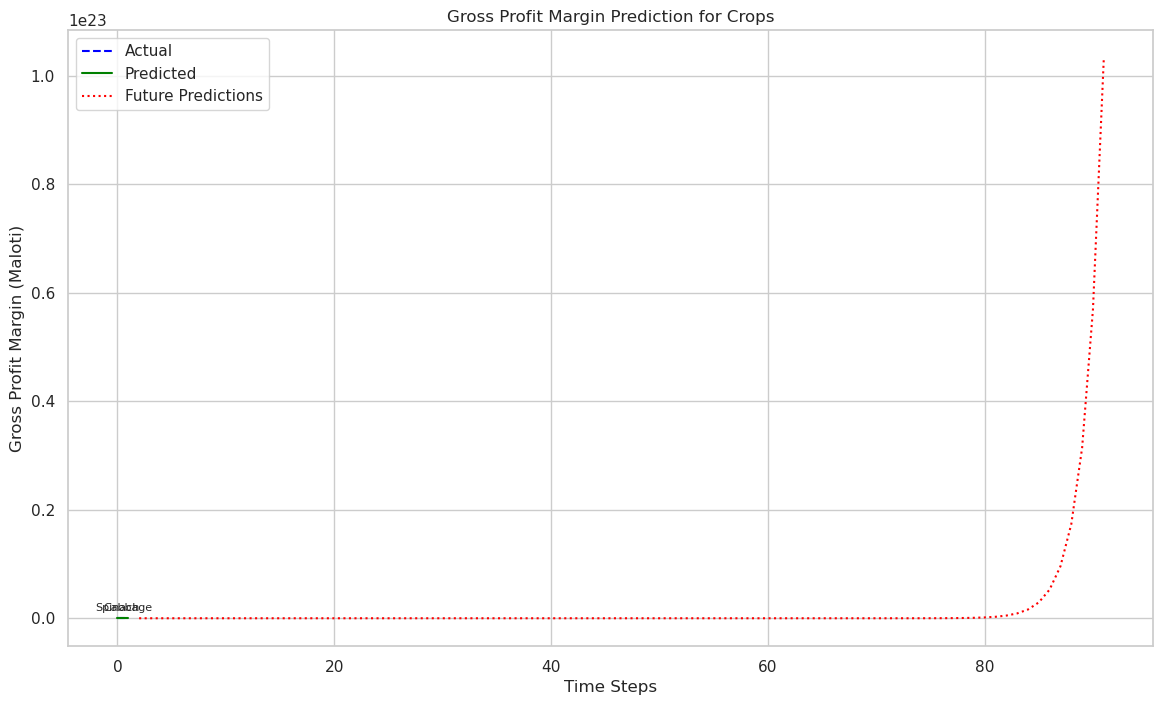

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test and y_test contain test data
# Also assuming future_preds_rescaled contains future predictions for 3 months ahead

# Generate predictions for test set (actual vs predicted)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Extract crop names from the one-hot encoded test data
# Find which crop each sample corresponds to
crop_columns = [col for col in df.columns if col.startswith('Crops_')]
crop_names_test = np.argmax(X_test[:, -1, -len(crop_columns):], axis=1)
unique_crops = df.columns[df.columns.str.startswith('Crops_')].str.replace('Crops_', '')

# Map the test crop indices to crop names
crop_names_test = [unique_crops[i] for i in crop_names_test]

# Plot actual vs predicted values for each crop
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot actual values
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual", color="blue", linestyle="--")

# Plot predicted values
plt.plot(y_pred_rescaled, label="Predicted", color="green")

# Add legend for each crop based on actual vs predicted points
for idx, crop in enumerate(crop_names_test):
    plt.annotate(crop, (idx, y_pred_rescaled[idx]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Add future predictions (for 3 months ahead)
plt.plot(np.arange(len(y_test), len(y_test) + len(future_preds_rescaled)), future_preds_rescaled, label="Future Predictions", color="red", linestyle="dotted")

# Labeling
plt.title("Gross Profit Margin Prediction for Crops")
plt.xlabel("Time Steps")
plt.ylabel("Gross Profit Margin (Maloti)")
plt.legend()
plt.show()
